In [1]:
# we're in the endgame now

from observer import *
from controller import *
%matplotlib inline
truth_x = np.load('./combined.npy')[:10000,0]
truth_y = np.load('./combined.npy')[:1000,1]

0.2639935096726233 28.94821509838483 -3.667346375278318e-09 -0.6692415189947735


/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Starting at timestep 1


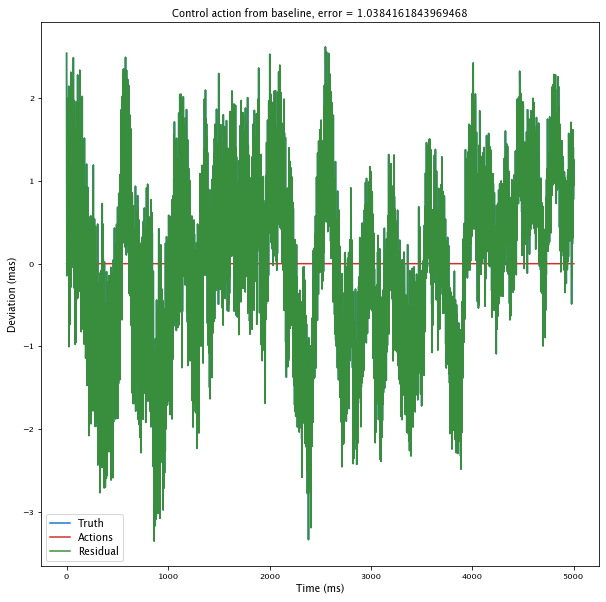

In [2]:
show_control('baseline', truth_x)

Starting at timestep 1


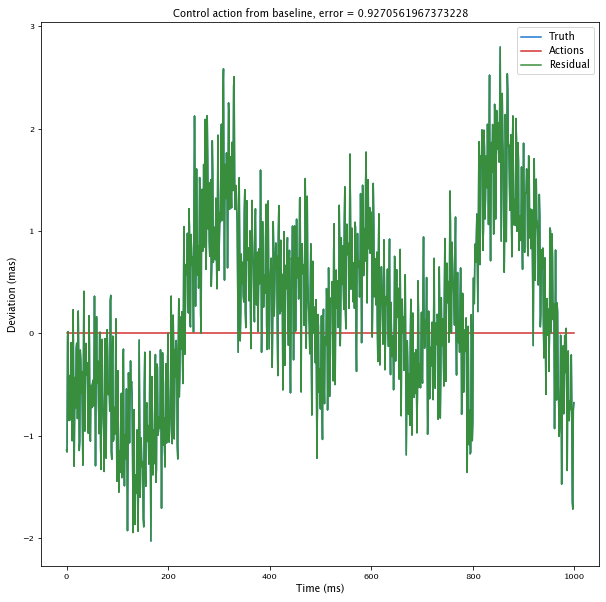

In [3]:
show_control('baseline', truth_y)

Starting at timestep 3


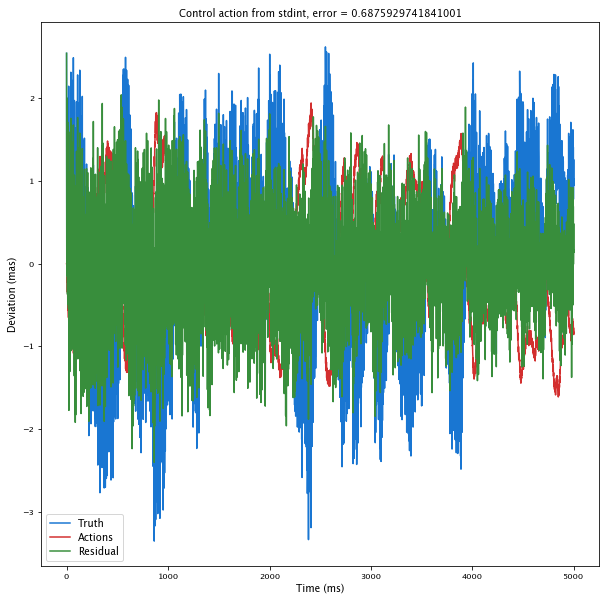

In [4]:
show_control('stdint', truth_x)

Starting at timestep 3


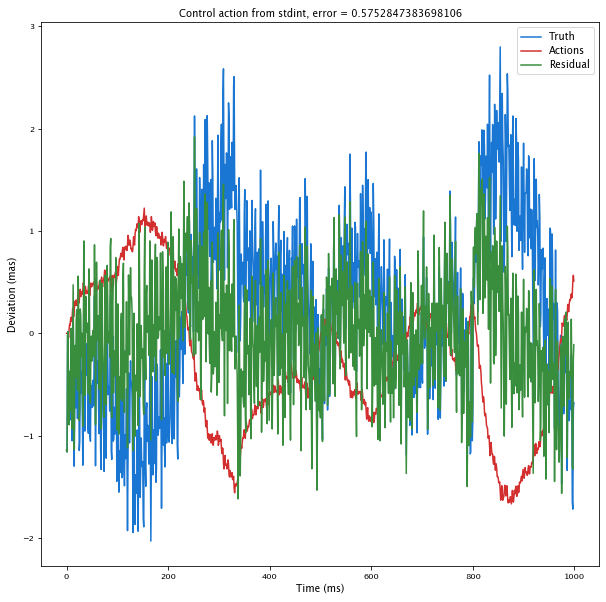

In [5]:
show_control('stdint', truth_y)

In [6]:
vibe_x = np.load('./vibe.npy')[:,0]
run, predict = vibe.kfilter.run(vibe_x + np.random.normal(0, 0.06, (vibe_x.size,)), save_physics=True)
plt.figure(figsize=(10,10))
plt.loglog(*signal.periodogram(vibe_x, fs=f_sampling), label="True PSD")
plt.loglog(*signal.periodogram(predict, fs=f_sampling), label="PSD of Kalman predictions")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"Power spectral density (mas$^2$/Hz)")
plt.legend()
plt.ylim(1e-7)
plt.savefig('./vibe_fit.png')

IndexError: too many indices for array

In [ ]:
run, predict = vibe.kfilter.run(truth_y + np.random.normal(0, 0.06, (size,)), save_physics=True)
res_y = truth_y - predict
show_control('kalman', res_y)

In [ ]:
'''from controller import *
combined = np.load('./combined.npy')
plt.figure(figsize=(10,10))
plt.plot(combined[:,0], combined[:,1], 'ko-', label="Uncorrected")
stdint_x, _, _ = stdint.control(combined[:,0])
stdint_y, _, _ = stdint.control(combined[:,1])
plt.plot(stdint_x, stdint_y, 'ro-', label="Standard-integrator controlled")
res_real_x = np.load('./kalman_res_x.npy')
res_real_y = np.load('./kalman_res_y.npy')
plt.plot(res_real_x, res_real_y, 'go-', label="Kalman-filter controlled")
plt.xlabel("x deviations (mas)")
plt.ylabel("y deviations (mas)")
plt.legend()
plt.savefig('./rms_spots.svg')'''

In [ ]:
import numpy as np
keck = np.load('keck_tt/OpenLoop_n0088.npy')[:1000,0]
from observer import make_impulse


In [ ]:
combined = np.load('./combined.npy')[:1000,0]
make_impulse(truth_x)

In [ ]:
plt.figure(figsize=(10,10))
imshow_field(make_specific_tt((1,1)).phase)
plt.xlabel(r"x position on detector ($\lambda$/D)")
plt.ylabel(r"y position on detector ($\lambda$/D)")
plt.savefig('./phase.png')

In [ ]:
make_impulse(truth_x)

In [7]:
vibe = np.load('./vibe.npy')

In [8]:
vibe.shape
import copy

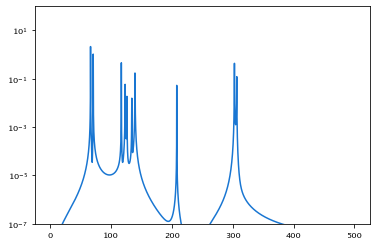

In [9]:
f, P = signal.periodogram(vibe, fs=f_sampling)
plt.semilogy(f, P)
plt.ylim(1e-7)
P_true = copy.deepcopy(P)

Starting at timestep 200


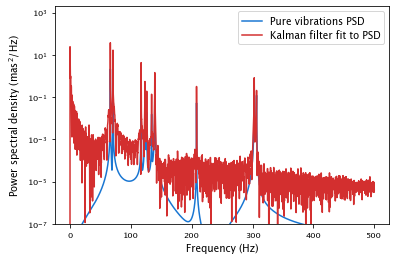

In [18]:
from controller import Controller
from observer import *
vibe_control = Controller('kalman', make_kfilter_vibe(*vibe_fit_freq(noise_filter(P), N=10)), calibration_time=200)
predictions, actions, openloop = vibe_control.control(vibe)
plt.semilogy(f, P_true, label='Pure vibrations PSD')
plt.semilogy(*signal.periodogram(predictions, fs=f_sampling), label='Kalman filter fit to PSD')
plt.ylim(1e-7)
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power spectral density (mas$^2$/Hz)')
plt.legend()

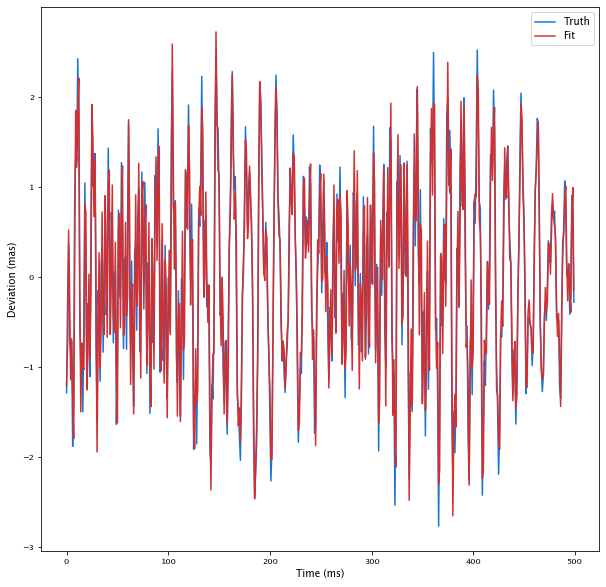

In [21]:
res, phy = vibe_control.kfilter.run(vibe[300:800], save_physics=True)
plt.figure(figsize=(10,10))
plt.plot(vibe[300:800], label='Truth')
plt.plot(-phy, label='Fit')
plt.xlabel("Time (ms)")
plt.ylabel("Deviation (mas)")
plt.legend()
plt.savefig('./freqfittime.svg')

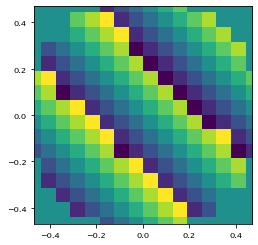

In [25]:
imshow_field(make_specific_tt((1,1)).phase)